beta: 0.3	 beta scale:1


<function matplotlib.pyplot.close(fig=None)>

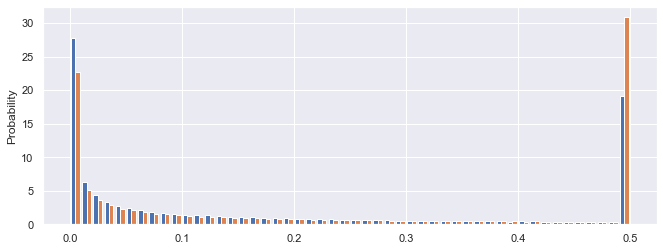

In [3]:
import sys
import numpy as np
import scipy.special as sps
from tqdm import tqdm_notebook
import pickle
import pandas as pd
import plotly
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import time
import init as z
import simulate_corona as sc
import simulate_corona_senior as scs
import multiprocessing as mp
import load_part as lp

sns.set(rc={'figure.figsize':(11, 4)})

## Plotting
## 1. Histogram beta ~ gamma dist
# parameters: shape,scale,size
sim_num=10**5
num_bin = 50
beta = z.beta;
beta_scale = z.beta_scale
print("beta: "+str(beta)+"\t beta scale:"+str(beta_scale))

beta_vec1 = np.random.gamma(beta,beta_scale,sim_num)
beta_vec2 = np.random.gamma(beta,2*beta_scale,sim_num)
beta_max0 = 0.75
beta_vec_adj1 = np.where(beta_vec1>beta_max0,beta_max0, beta_vec1)
beta_vec_adj2 = np.where(beta_vec2>beta_max0,beta_max0, beta_vec2)
cnt,bins,ign = plt.hist([beta_vec_adj1,beta_vec_adj2],bins=num_bin,density=True)
plt.legend(['1' '2'])
plt.ylabel('Probability')
plt.savefig("./fig/Histogram_betas_0.png")
plt.close

In [1]:
# 2. Histogram: beta~ beta dist. (very narrow)
beta_vec = np.random.beta(40,95,sim_num)
cnt,bins,ign = plt.hist(beta_vec,bins=num_bin,density=True)
plt.savefig("./fig/Histogram_betas_1.png")
plt.close

NameError: name 'np' is not defined

In [ ]:
# 3. distribution for R0
# assumption: gamma is a scalar, not a random variable

R0_vec = np.random.gamma(z.beta/z.gamma,z.beta_scale,200000)
print("R0:="+str(z.R0))
R0_max = beta_max0/z.gamma
R0_vec = np.where(R0>R0_max, R0_max, R0)
cnt,bins,ign=plt.hist(R0_vec,bins=50,density=True)
yy=bins**(z.R0-1)*(np.exp(-bins/sc)/(sps.gamma(z.R0)*sc**z.R0))
plt.plot(bins,yy,linewidth=2,color='r')
plt.ylabel('Probability')
plt.savefig("./fig/Histogram_R0.png")
plt.close